In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("../data/heart_selected_unsuper.csv")
X = df.drop(columns=["target"])
y = df["target"]

In [2]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)  # X from your previous dataset (no target)

# **Unsupervised Learning - Clustering**  
## 1. Apply K-Means Clustering 
Elbow method to determine K 

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Malak.Ossama\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Malak.Ossama\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Malak.Ossama\AppData\Local\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Malak.Ossama\AppData\Local\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_chil

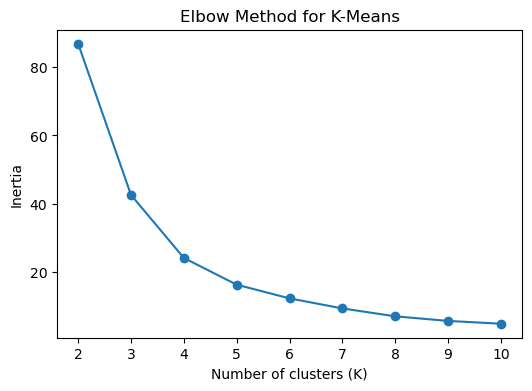

In [4]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

C:\Users\Malak.Ossama\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


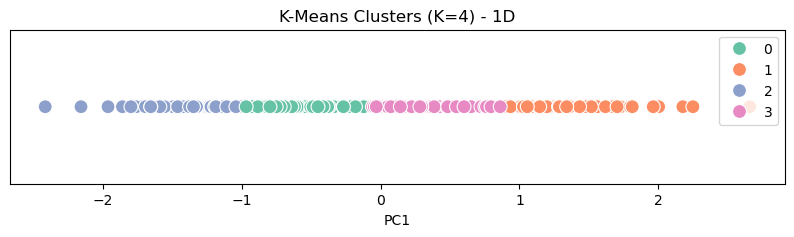

In [5]:
from sklearn.decomposition import PCA

# Choose optimal K based on elbow (replace with your observation)
optimal_k = 4

# 1b. Fit K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 1c. Visualize K-Means clusters in 2D using PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,2))
sns.scatterplot(x=X_pca[:,0], y=[0]*len(X_pca), hue=kmeans_labels, palette="Set2", s=100)
plt.title(f"K-Means Clusters (K={optimal_k}) - 1D")
plt.xlabel("PC1")
plt.yticks([])
plt.show()


## 2. Perform Hierarchical Clustering 
Dendrogram Analysis

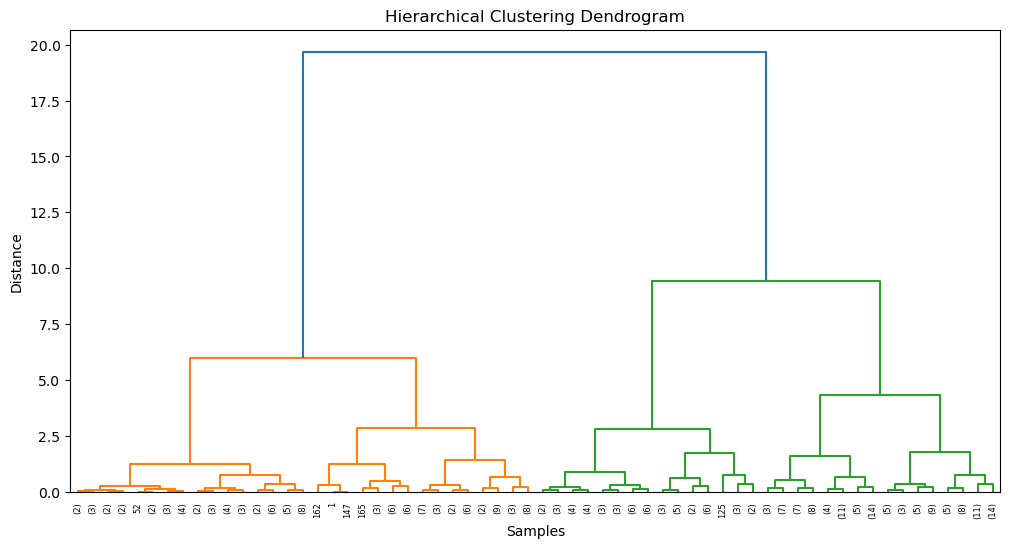

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 2a. Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# 2b. Agglomerative Clustering
hier_clusters = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hier_labels = hier_clusters.fit_predict(X_scaled)


In [7]:
from sklearn.metrics import silhouette_score

kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
hier_sil = silhouette_score(X_scaled, hier_labels)

print(f"K-Means silhouette score: {kmeans_sil:.2f}")
print(f"Hierarchical silhouette score: {hier_sil:.2f}")


K-Means silhouette score: 0.56
Hierarchical silhouette score: 0.52


## 3. Compare Clusters 
With actual disease labels

In [8]:
comparison_df = pd.DataFrame({
    "Target": y,
    "KMeans_Cluster": kmeans_labels,
    "Hierarchical_Cluster": hier_labels
})

print("K-Means vs Target:")
print(pd.crosstab(comparison_df["KMeans_Cluster"], comparison_df["Target"]))

print("\nHierarchical vs Target:")
print(pd.crosstab(comparison_df["Hierarchical_Cluster"], comparison_df["Target"]))

K-Means vs Target:
Target           0   1   2   3  4
KMeans_Cluster                   
0               31  19  13  11  3
1               52   6   0   0  0
2                9  12  13  11  7
3               66  16   6   7  1

Hierarchical vs Target:
Target                 0   1   2   3  4
Hierarchical_Cluster                   
0                     80  21   7   9  2
1                      9  13  14  16  7
2                     47   6   0   0  0
3                     22  13  11   4  2
